Importing Libraries:

In [34]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Common Functions to use:

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def crossEntropyLoss(y_true, y_pred):
    return -(1/len(y_true)) * np.sum(y_true * np.log(y_pred+1e-8) + (1 - y_true) * np.log(1 - y_pred+1e-8))



Preprocessing Dataset:

In [36]:
dataset = pd.read_csv('HeartDisease.csv')


# fill null values with modes and means
columns_to_fill = ['education', 'cigsPerDay', 'BPMeds']
modes = dataset[columns_to_fill].mode().iloc[0]
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(modes)

columns_to_fill = ['totChol', 'BMI', 'glucose', "heartRate"]
means = dataset[columns_to_fill].mean()
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(means)


#undersample majority class for balanced dataset
majority_class = dataset['HeartDisease'].value_counts().idxmax()
minority_class = dataset['HeartDisease'].value_counts().idxmin()
majority_class_data = dataset[dataset['HeartDisease'] == majority_class]
minority_class_data = dataset[dataset['HeartDisease'] == minority_class]
majority_class_undersampled = majority_class_data.sample(len(minority_class_data), random_state=42)
undersampled_dataset = pd.concat([majority_class_undersampled, minority_class_data])
undersampled_dataset = undersampled_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = undersampled_dataset



#split dataset into train, validation and test sets
trainSet, tempSet = train_test_split(dataset, test_size=0.30, random_state=42)
valSet, testSet = train_test_split(tempSet, test_size=0.50, random_state=42)

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 0: Train Loss = 0.6348929308990832, Validation Loss = 0.6259121687480885


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 100: Train Loss = 0.6236972527774747, Validation Loss = 0.6146542587097386
Iteration 200: Train Loss = 0.6228366584474737, Validation Loss = 0.6151131033572776
Iteration 300: Train Loss = 0.6221421412214719, Validation Loss = 0.614270738584283
Iteration 400: Train Loss = 0.6216298765270112, Validation Loss = 0.6141684893126267
Iteration 500: Train Loss = 0.6211834817231673, Validation Loss = 0.6134845084687348
Iteration 600: Train Loss = 0.6207989307059872, Validation Loss = 0.6137660492957197
Iteration 700: Train Loss = 0.6204642263076241, Validation Loss = 0.6131168727156492
Iteration 800: Train Loss = 0.6201473258399647, Validation Loss = 0.6133447049977611
Iteration 900: Train Loss = 0.6198488714422634, Validation Loss = 0.6128949779614814
Iteration 1000: Train Loss = 0.619574538306326, Validation Loss = 0.61267880440242
Iteration 1100: Train Loss = 0.6193318899770744, Validation Loss = 0.6131177613597076
Iteration 1200: Train Loss = 0.61908278589683, Validation Loss = 0.

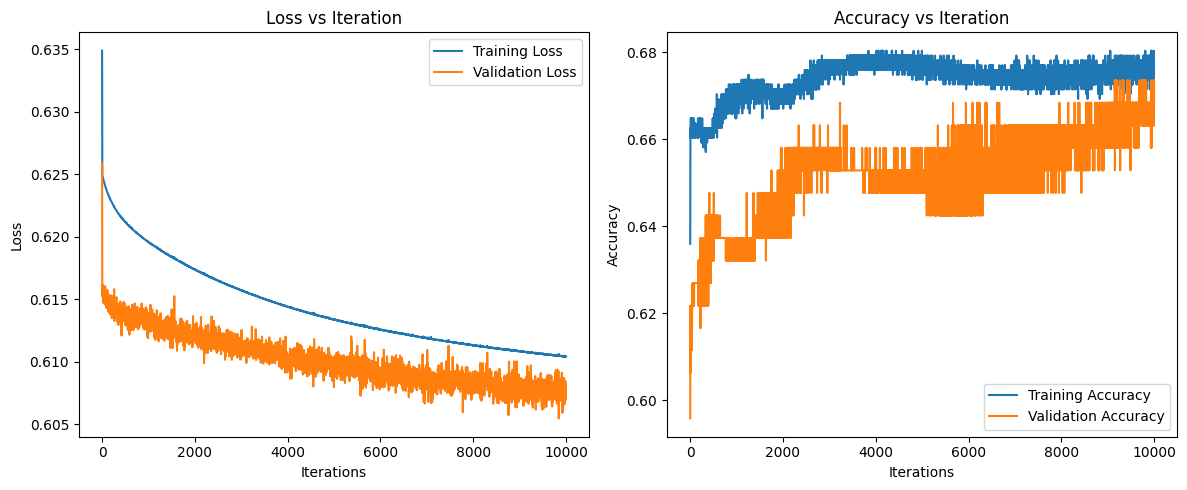

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming dataset is already loaded as 'dataset' and split into 'trainSet', 'valSet', and 'testSet'

# 1. Data Preprocessing
# Standardizing the dataset
# scaler = StandardScaler()
X_train = trainSet.drop(columns=['HeartDisease'])
y_train = trainSet['HeartDisease'].values

X_val = valSet.drop(columns=['HeartDisease'])
y_val = valSet['HeartDisease'].values

# 2. Logistic Regression with sklearn and Batch Gradient Descent (saga solver)
def track_loss_accuracy(model, X_train, y_train, X_val, y_val, iterations):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []  # Corrected line: Separate the accuracy lists

    for i in range(iterations):
        # Fit model using warm_start to retain the weights and continue training
        model.fit(X_train, y_train)

        # Calculate train loss and accuracy
        train_pred_prob = model.predict_proba(X_train)[:, 1]
        train_loss = -np.mean(y_train * np.log(train_pred_prob) + (1 - y_train) * np.log(1 - train_pred_prob))
        train_accuracy = model.score(X_train, y_train)

        # Calculate validation loss and accuracy
        val_pred_prob = model.predict_proba(X_val)[:, 1]
        val_loss = -np.mean(y_val * np.log(val_pred_prob) + (1 - y_val) * np.log(1 - val_pred_prob))
        val_accuracy = model.score(X_val, y_val)

        # Store loss and accuracy
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss = {train_loss}, Validation Loss = {val_loss}")

    return train_losses, val_losses, train_accuracies, val_accuracies


# 3. Define Logistic Regression model with saga solver
model = LogisticRegression(
    solver='saga',  # Supports batch gradient descent
    max_iter=1000,     # We manually control iterations for tracking loss and accuracy
    warm_start=True # Allows continuation of training from previous weights
)

# 4. Run training and track loss and accuracy
iterations = 10000
train_losses, val_losses, train_accuracies, val_accuracies = track_loss_accuracy(
    model, X_train, y_train, X_val, y_val, iterations
)

# 5. Plot Results
# Plot training and validation loss vs iteration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.legend()

# Plot training and validation accuracy vs iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration')
plt.legend()

plt.tight_layout()
plt.show()


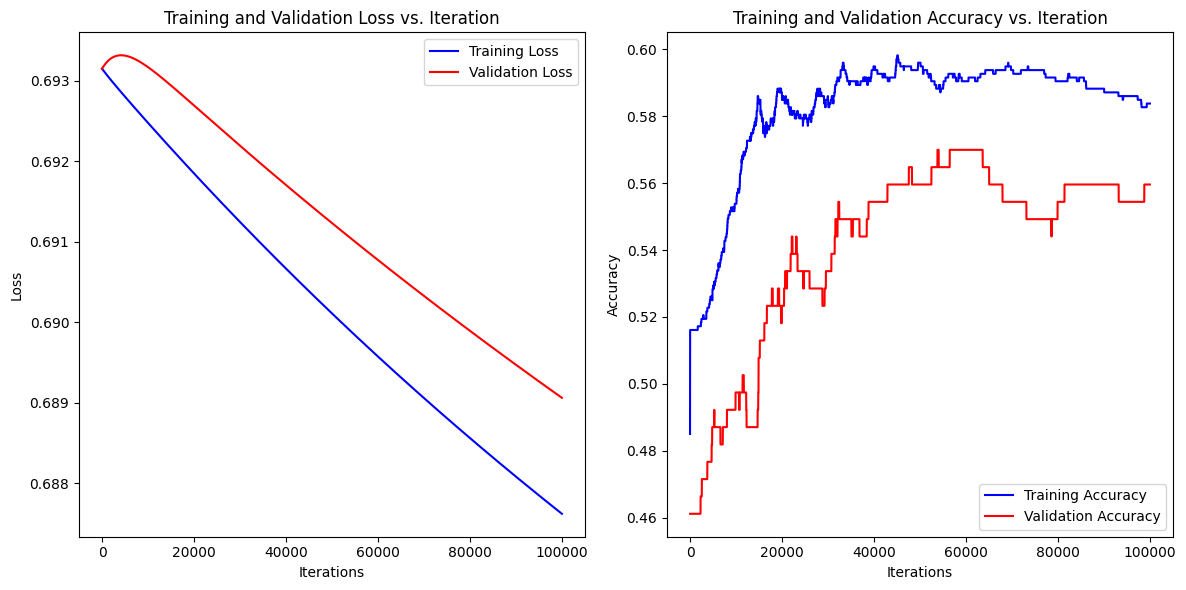

In [41]:
def LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = []
    train_accuracy_history = []
    val_cost_history = []
    val_accuracy_history = []
    weights = np.zeros(X_train.shape[1])
    bias = 0
    for i in range(iterations):
        z = np.dot(X_train, weights) + bias
        y_pred = sigmoid(z)
        dw = (1/m) * np.dot(X_train.T, y_pred - y_train)
        db = (1/m) * np.sum(y_pred - y_train)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        loss = crossEntropyLoss(y_train, y_pred)
        train_cost_history.append(loss)
        val_y_pred = sigmoid(np.dot(X_val, weights) + bias)
        loss = crossEntropyLoss(y_val, val_y_pred)
        val_cost_history.append(loss)
        accuracy = np.mean((y_pred >= 0.5) == y_train)
        train_accuracy_history.append(accuracy)
        accuracy = np.mean((val_y_pred >= 0.5) == y_val)
        val_accuracy_history.append(accuracy)
    return weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred


X_train = trainSet.iloc[:, :-1].values
y_train = trainSet.iloc[:, -1].values
X_val = valSet.iloc[:, :-1].values
y_val = valSet.iloc[:, -1].values
iterations = 100000
learning_rate = 0.00000001

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred = LogisticRegressionBatchGD(X_train, y_train,X_val, y_val, learning_rate, iterations)

# Plotting
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

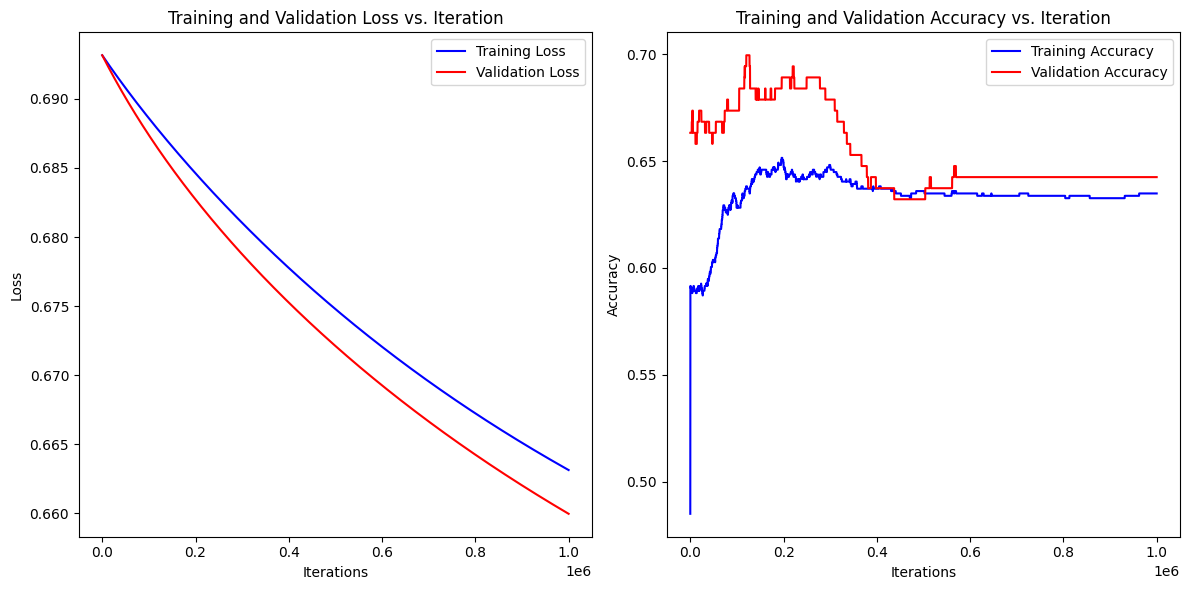

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history,val_y_pred = LogisticRegressionBatchGD(X_train_scaled, y_train,X_val_scaled, y_val, learning_rate, iterations)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Assume y_true and y_pred are your true and predicted labels
print(y_val)
print(val_y_pred)
val_y_pred_binary = (val_y_pred >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, val_y_pred_binary)
tn, fp, fn, tp = conf_matrix.ravel()

precision = precision_score(y_val, val_y_pred_binary)
recall = recall_score(y_val, val_y_pred_binary)
f1 = f1_score(y_val, val_y_pred_binary)
roc_auc = roc_auc_score(y_val, val_y_pred_binary)  # y_prob are the predicted probabilities

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")


[1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 1 1 0]
[0.57180958 0.53716643 0.59485043 0.4585888  0.59032057 0.43548289
 0.49236415 0.49481903 0.52809117 0.58806271 0.50563304 0.43816687
 0.49345576 0.5920162  0.46260631 0.44883101 0.48288469 0.59627645
 0.43134785 0.47956224 0.48854563 0.59290303 0.61049174 0.46832484
 0.49060252 0.48554036 0.57926382 0.4263467  0.58006671 0.49168072
 0.45968231 0.41146572 0.45980715 0.49609044 0.54517327 0.51975163
 0.44284982 0.56022887 0.44280387 0.46444144 0.63162948 0.55648899
 0.64121975 0.4712311  0.46405628 0.5313028  0.57761395 0.57729527
 0.46949229 0.59041277 0.43462481 0.52835475 0.47536596 0.46838129
 0.4

Training with Stochastic Gradient Descent:
SGD Iteration 0 - Training Loss: 0.6926789946631527, Validation Loss: 0.6927769752526896, Training Accuracy: 0.5549389567147613, Validation Accuracy: 0.5751295336787565
SGD Iteration 100 - Training Loss: 0.6649313701873566, Validation Loss: 0.6677181032543925, Training Accuracy: 0.6437291897891232, Validation Accuracy: 0.6321243523316062
SGD Iteration 200 - Training Loss: 0.6512092599320802, Validation Loss: 0.6549031850333737, Training Accuracy: 0.6448390677025527, Validation Accuracy: 0.6217616580310881
SGD Iteration 300 - Training Loss: 0.643204324211979, Validation Loss: 0.6467275189286051, Training Accuracy: 0.6459489456159823, Validation Accuracy: 0.6113989637305699
SGD Iteration 400 - Training Loss: 0.6376464671788009, Validation Loss: 0.6410444854430754, Training Accuracy: 0.6514983351831298, Validation Accuracy: 0.6113989637305699
SGD Iteration 500 - Training Loss: 0.6336268106827769, Validation Loss: 0.6366322664088863, Training Accu

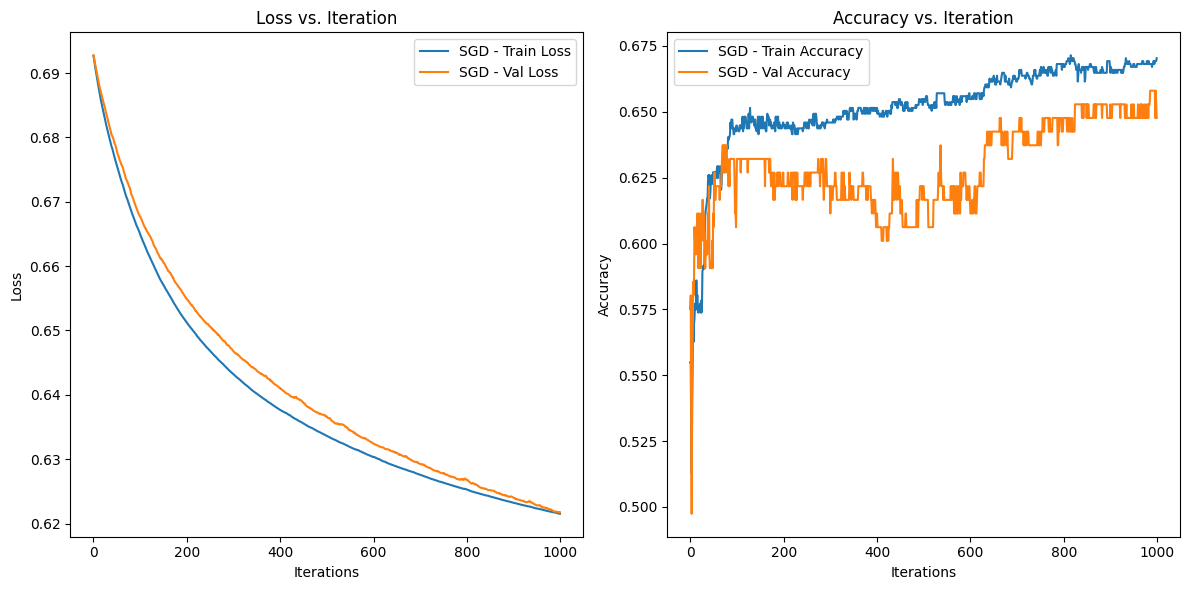

In [26]:
def accuracy(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def LogisticRegressionSGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    
    for i in range(iterations):
        for j in range(m):  # SGD updates after each sample
            random_idx = np.random.randint(0, m)
            X_i = X_train[random_idx, :].reshape(1, -1)
            y_i = y_train[random_idx]

            # Compute prediction
            z = np.dot(X_i, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_i
            dw = np.dot(X_i.T, dz)
            db = dz

            # Update weights and bias
            weights -= learning_rate * dw.flatten()
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'SGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

# Hyperparameters
learning_rate = 0.0001
iterations = 1000

# SGD
print("Training with Stochastic Gradient Descent:")
weights_sgd, bias_sgd, train_cost_sgd, val_cost_sgd, train_acc_sgd, val_acc_sgd = LogisticRegressionSGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations)

# Plot Training Loss for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_sgd, label='SGD - Train Loss')
plt.plot(val_cost_sgd, label='SGD - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_sgd, label='SGD - Train Accuracy')
plt.plot(val_acc_sgd, label='SGD - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Training with Mini-Batch Gradient Descent (batch size = 32):
MBGD Iteration 0 - Training Loss: 0.6916210577417082, Validation Loss: 0.6918924519861013, Training Accuracy: 0.5527192008879024, Validation Accuracy: 0.5647668393782384
MBGD Iteration 100 - Training Loss: 0.6422590600445922, Validation Loss: 0.6459835697332611, Training Accuracy: 0.6470588235294118, Validation Accuracy: 0.6217616580310881
MBGD Iteration 200 - Training Loss: 0.6295888797433246, Validation Loss: 0.6318646027814453, Training Accuracy: 0.6592674805771365, Validation Accuracy: 0.6373056994818653
MBGD Iteration 300 - Training Loss: 0.6226074967378333, Validation Loss: 0.6232835434346257, Training Accuracy: 0.6659267480577137, Validation Accuracy: 0.6476683937823834
MBGD Iteration 400 - Training Loss: 0.6180961530135435, Validation Loss: 0.6174648946010141, Training Accuracy: 0.6714761376248612, Validation Accuracy: 0.6580310880829016
MBGD Iteration 500 - Training Loss: 0.615021771029209, Validation Loss: 0.613324

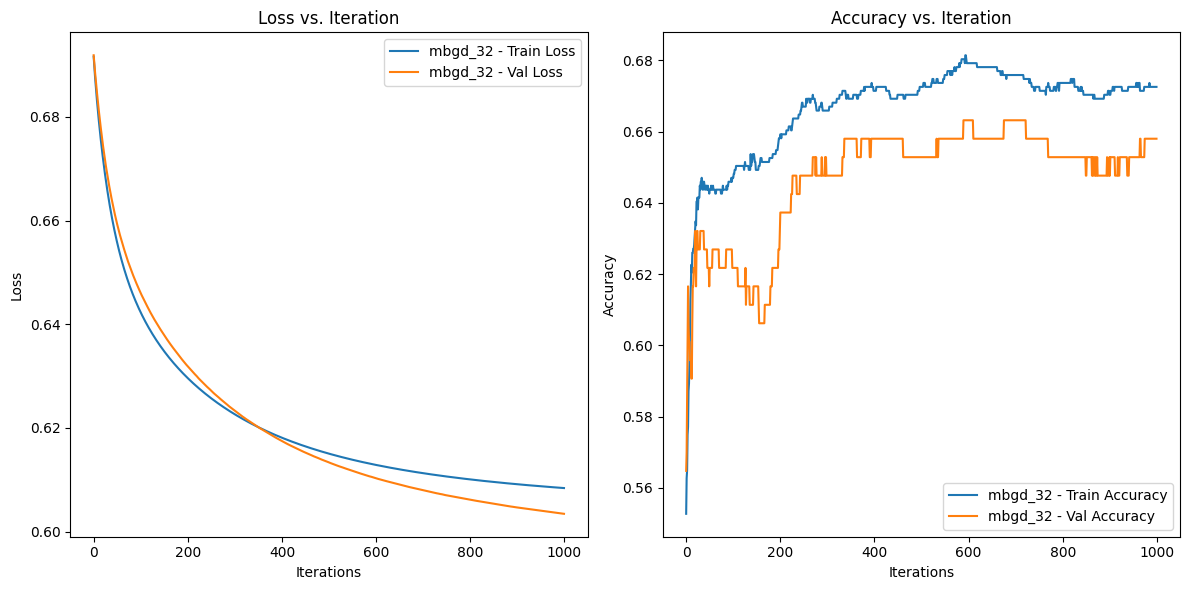


Training with Mini-Batch Gradient Descent (batch size = 64):
MBGD Iteration 0 - Training Loss: 0.6923604287638777, Validation Loss: 0.6925060370850606, Training Accuracy: 0.5283018867924528, Validation Accuracy: 0.5129533678756477
MBGD Iteration 100 - Training Loss: 0.6558962016720834, Validation Loss: 0.6594691807626529, Training Accuracy: 0.6426193118756937, Validation Accuracy: 0.616580310880829
MBGD Iteration 200 - Training Loss: 0.6423546910836354, Validation Loss: 0.6460930510410084, Training Accuracy: 0.6481687014428413, Validation Accuracy: 0.6217616580310881
MBGD Iteration 300 - Training Loss: 0.6348139683364452, Validation Loss: 0.6379149884772223, Training Accuracy: 0.6492785793562708, Validation Accuracy: 0.616580310880829
MBGD Iteration 400 - Training Loss: 0.6296344109755485, Validation Loss: 0.6319230126911486, Training Accuracy: 0.658157602663707, Validation Accuracy: 0.6373056994818653
MBGD Iteration 500 - Training Loss: 0.625721407672631, Validation Loss: 0.627177963

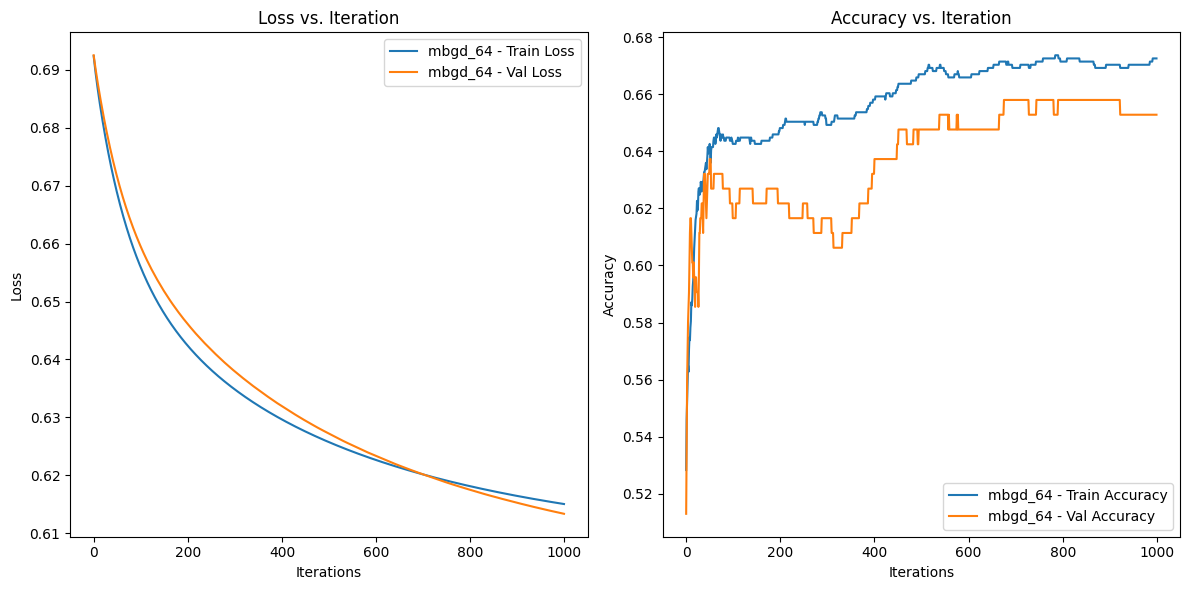

In [27]:
def LogisticRegressionMiniBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations, batch_size):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    for i in range(iterations):
        # Shuffle the training data for each iteration
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, m, batch_size):  # Iterate through mini-batches
            X_batch = X_train_shuffled[j:j+batch_size]
            y_batch = y_train_shuffled[j:j+batch_size]

            # Compute prediction
            z = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_batch
            dw = np.dot(X_batch.T, dz) / batch_size
            db = np.sum(dz) / batch_size

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'MBGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

learning_rate = 0.01
iterations = 1000

# Mini-Batch GD with batch size = 32
print("\nTraining with Mini-Batch Gradient Descent (batch size = 32):")
batch_size = 32
weights_mbgd_32, bias_mbgd_32, train_cost_mbgd_32, val_cost_mbgd_32, train_acc_mbgd_32, val_acc_mbgd_32 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_32, label='mbgd_32 - Train Loss')
plt.plot(val_cost_mbgd_32, label='mbgd_32 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_32, label='mbgd_32 - Train Accuracy')
plt.plot(val_acc_mbgd_32, label='mbgd_32 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Mini-Batch GD with batch size = 64
print("\nTraining with Mini-Batch Gradient Descent (batch size = 64):")
batch_size = 64
weights_mbgd_64, bias_mbgd_64, train_cost_mbgd_64, val_cost_mbgd_64, train_acc_mbgd_64, val_acc_mbgd_64 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_64, label='mbgd_64 - Train Loss')
plt.plot(val_cost_mbgd_64, label='mbgd_64 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_64, label='mbgd_64 - Train Accuracy')
plt.plot(val_acc_mbgd_64, label='mbgd_64 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
def accuracy_score(y_true, y_pred):
    return np.mean((y_pred == y_true))

def k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000):
    np.random.seed(42)
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]
    
    fold_size = len(y) // k
    folds_X = [X[i*fold_size:(i+1)*fold_size] for i in range(k)]
    folds_y = [y[i*fold_size:(i+1)*fold_size] for i in range(k)]
    
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    # Perform cross-validation
    for i in range(k):
        # Use fold i as the validation set, and the rest as training set
        X_val, y_val = folds_X[i], folds_y[i]
        X_train = np.vstack([folds_X[j] for j in range(k) if j != i])
        y_train = np.hstack([folds_y[j] for j in range(k) if j != i])
        
        # Train the logistic regression model
        weights, bias,a,b,c,d,e = LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations)
        
        # Make predictions on validation set
        y_val_pred_prob = sigmoid(np.dot(X_val, weights) + bias)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
        
        # Calculate metrics
        accuracies.append(accuracy_score(y_val, y_val_pred))
        precisions.append(precision_score(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        f1_scores.append(f1_score(y_val, y_val_pred))

    # Calculate mean and standard deviation for each metric
    print(f'Accuracy: Mean = {np.mean(accuracies):.4f}, Std = {np.std(accuracies):.4f}')
    print(f'Precision: Mean = {np.mean(precisions):.4f}, Std = {np.std(precisions):.4f}')
    print(f'Recall: Mean = {np.mean(recalls):.4f}, Std = {np.std(recalls):.4f}')
    print(f'F1 Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}')

    return accuracies, precisions, recalls, f1_scores

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000)


C:\Users\himan\AppData\Local\Temp\ipykernel_5648\1578794637.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\himan\AppData\Local\Temp\ipykernel_5648\1578794637.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\himan\AppData\Local\Temp\ipykernel_5648\1578794637.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\himan\AppData\Local\Temp\ipykernel_5648\1578794637.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\himan\AppData\Local\Temp\ipykernel_5648\1578794637.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: Mean = 0.5253, Std = 0.0285
Precision: Mean = 0.7416, Std = 0.1436
Recall: Mean = 0.2870, Std = 0.3489
F1 Score: Mean = 0.2862, Std = 0.1808


([0.5097276264591439,
  0.5369649805447471,
  0.5680933852140078,
  0.48249027237354086,
  0.5291828793774319],
 [0.7391304347826086, 0.8235294117647058, 0.9, 0.476, 0.7692307692307693],
 [0.12408759124087591,
  0.1076923076923077,
  0.14173228346456693,
  0.9834710743801653,
  0.078125],
 [0.2125,
  0.19047619047619047,
  0.24489795918367346,
  0.6415094339622641,
  0.14184397163120568])